# Машинное обучение, DS-поток
## Задание ML.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил вывод формулы (арифметическая ошибка)</font></b>
  
* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы формул (x2)</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы после визуализации </font></b>
  
* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Исправил код графика</font></b>
  * <b><font color="#00b565" size="3">Исправил поиск гиперпараметров</font></b>
  * <b><font color="#00b565" size="3">Исправил округления</font></b>
  
* <b><font size="4">Задача 4</font></b>
  * <b><font color="#00b565" size="3">Исправил округления</font></b>
  * <b><font color="#00b565" size="3">Исправил ответ на вопрос </font></b>


In [1]:
# Bot check

# HW_ID: ds_ml1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
from numpy.linalg import svd, cond
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.base import BaseEstimator

import warnings

warnings.filterwarnings("ignore")

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

Задача Ridge-регрессии выглядит как 
$$
f(\theta) = \lVert Y - X \theta\rVert^2_2 + \alpha \cdot \lVert\theta\rVert^2_2 \rightarrow \min
$$
При оптимизации по параметру $\theta$

В силу
$$
f(\theta) = (Y - X \theta)^T(Y - X \theta) + \alpha \theta^T \theta = Y^T Y - \theta^T X^T Y - Y^T X \theta + \theta^T X^T X \theta + \alpha \theta^T \theta
$$
$$
f(\theta) = Y Y^T + (-2 Y^T X) \theta  + \theta^T(\alpha I + X^T X) \theta
$$
$$
\nabla f (\theta) = -2 X^T Y + (2 \alpha  I + 2X^T X) \theta
$$

<b><font color="#00b565" size="5">Исправил вывод формулы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Арифметическая ошибка, ошибка в переходе. Инд. комм. В качестве функции для Pr стоило взять только theta^2 (см. лекцию) </i>

Повторяя выкладки из статьи:
$$
\theta^* = prox_{\eta x^2}(\theta^k) \Leftrightarrow 
$$
$$
\nabla \left(f(\theta^k) + \nabla f(\theta^k)(\theta^* - \theta^k) + \frac{1}{2\eta} \lVert \theta^* - \theta^k\rVert_2^2) \right) = 0
$$
$$
\eta \nabla f(\theta^k) + \theta^* - \theta^k = 0
$$
$$
\theta^* = \theta^k - \eta \left( -2 X^T Y + (2 \alpha  I + 2X^T X) \theta \right)
$$

<b><font color="#00b565" size="3">===== Конец исправлений в задаче 1 =====</font></b>

Итоговая формула будет
$$
\theta^{k+1} = \theta^k - \eta \left( -2 X^T Y + (2 \alpha  I + 2X^T X) \theta \right)
$$

**Вывод**: $\alpha$ не позволяет параметрам модели слишком сильно вырасти, при больших по модулю $\theta$ он начинает играть большую роль и ограничивает рост $\theta$, так можно избежать переобучения модели. При этом слишком высокие значение $\alpha$ будут приводить к занулению весов, что сильно ухудшает предсказательную силу модели.

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

Будем строить следующие границы:

Lasso: $|\theta_1| + |\theta_2| < A$

Ridge: $\theta_1^2 + \theta_2^2 < A^2$

Elastic: $|\theta_1| + |\theta_2| + \theta_1^2 + \theta_2^2 < A^2 + A$

(Ясно, что в общем случае соотношение между $A$ и $A^2$ может быть другим)

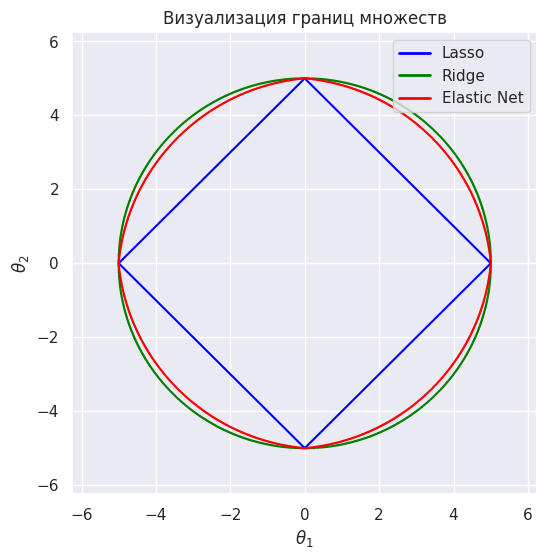

In [3]:
A = 5

x = np.linspace(- 1.25 * A, 1.25 * A, 2000)
y = np.linspace(- 1.25 * A, 1.25 * A, 2000)
X, Y = np.meshgrid(x, y)

region1 = np.abs(X) + np.abs(Y) < A
region2 = X**2 + Y**2 < A**2
region3 = np.abs(X) + np.abs(Y) + X**2 + Y**2 < A**2 + A

plt.figure(figsize=(6, 6))

plt.contour(X, Y, region1, levels=[0], colors='blue')
plt.contour(X, Y, region2, levels=[0], colors='green')
plt.contour(X, Y, region3, levels=[0], colors='red')

legend_lines = [
    Line2D([0], [0], color='blue', lw=2),
    Line2D([0], [0], color='green', lw=2),
    Line2D([0], [0], color='red', lw=2)
]
plt.legend(legend_lines, ['Lasso', 'Ridge', 'Elastic Net'])

plt.title('Визуализация границ множеств')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.grid(True)

plt.show()

<b><font color="#00b565" size="3">Исправил вывод</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Проксимальный оператор. Нет вывода о влиянии параметров регуляризации. Комм. Стоило как-то уточнить, как это влияние отличается от того, что мы получаем в Ridge и Lasso. (-5.0) </i>

**Вывод**:  Elastic Net в такой визуализации ограничивает область между кругом и ромбом, при разных соотношениях параметров может либо приближаться к ромбу, либо к кругу. В зависимости от значения параметра $l_{1 ratio}$, который регулирует соотношение между регуляризвациями, Elastic Net может либо приближаться к границам, характерным для Lasso (ромб), либо к границам для Ridge (круг). Эта гибкость Elastic Net позволяет комбинировать свойства Lasso и Ridge: как сжатие коэффициентов (Lasso), так и предотвращение переобучения (Ridge) 

[разница ровно в том, что Ridge сильнее штрафует за высокие значения параметров (в силу квадратичного члена), а Lasso сильнее штрафует в малой области нуля (модуль больше квадрата)].
 


**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

Задача Elastic Net-регрессии выглядит как 
$$
g(\theta) = \lVert Y - X \theta\rVert^2_2 + \beta \lVert\theta\rVert_1 + \alpha \lVert\theta\rVert^2_2 = f(\theta) + \beta \lVert\theta\rVert_1 \rightarrow \min
$$
При оптимизации по параметру $\theta$

<b><font color="#00b565" size="3">Исправил вывод формулы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Проксимальный оператор. Арифметическая ошибка, ошибка в переходе. </i>

В силу
$$
\theta^* = prox_{\eta x^2}(\theta^k) \Leftrightarrow 
$$
$$
\nabla (g(\theta^k) + \nabla g(\theta^k)(\theta^* - \theta^k) + \frac{1}{2\eta} \lVert \theta^* - \theta^k\rVert_2^2) = 0
$$
$$
\eta \nabla g(\theta^k) + \theta^* - \theta^k = 0
$$
Так как дифференцирование пониматься уже строго в смысле субдифференцирования (модуль будет субпроизводной):
$$
\nabla g(\theta^k) = \nabla f(\theta^k) + \beta \nabla \lVert\theta\rVert_1 = \nabla f(\theta^k) + \beta v
$$
Где $v$ - **такой вектор, что**
$$v_i = sign (\theta_i^k) $$
Используя выражения для $\nabla f(\theta)$ из предыдущей задачи получим в итоге
$$
\theta^* = \theta^k - \eta \left( -2 X^T Y + (2 \alpha  I + 2X^T X) \theta + \beta v \right) 
$$
Итерационная запись имеет вид:
$$
\theta^{k + 1} = \theta^k - \eta \left( -2 X^T Y + (2 \alpha  I + 2X^T X) \theta + \beta v \right) 
$$

**Вывод:** проксимальный оператор позволяет дифференцировать недифференцируемые функции

**3.** Выпишите формулы для градиентного и стохастического спуска

<b><font color="#00b565" size="3">Исправил вывод формулы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Перепутано транспонирование при переходе к стохастическому град. спуску. Комм. X^T X = sum_i x_i x_i^T, если x_i -- это вектор-столбец признаков для i-го объекта. </i>

GD:

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{n} (2 \theta_{old} \sum_{i = 1}^n x_i x_i^T, - 2 \sum_{i = 1}^n X_i Y_i + 2 \alpha \theta_{old} + \beta v)  $$
$$v_i = sign(\theta_i)$$

SGD с батчем размера $k$: случайно выбираются индексы $I = (i_1, i_2, \ldots i_k)$, причем $i_j \sim U(1, 2, \ldots n)$ - равномерно распределены:

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{k} (2 \theta_{old} \sum_{i \in I} x_i x_i^T - 2 \sum_{i \in I} X_i Y_i + 2 \alpha \theta_{old} + \beta v)  $$
$$v_i = sign(\theta_i)$$

($I$ на каждой итерации выбирается отдельно)

<b><font color="#00b565" size="3">===== Конец исправлений в задаче 2 =====</font></b>

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [4]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]

data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [5]:
X = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index'
]]

y = data[['Groceries Index']]

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(378, 5) (162, 5)
(378, 1) (162, 1)


Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Так как мы выбираем едино $\alpha, \beta$ для всех признаков, а их численные значения значения могут существенно отличатся (например численные метрики порядка 10^2 и бинарные категории 0-1), то нужно их сделать одного порядка, чтобы уравнять их веса.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

<b><font color="#00b565" size="3">Исправил код</font></b>

<b><font color="#00b565" size="3"> Замечание: </font></b> <i> Выбрана неудачная шкала для графика параметра l1.  Комм. Параметр l1 вполне без проблем может принимать значения от 0 до 1, неясно зачем тут использовать логарифмическую шкалу. Инд. комм. Ты перебираешь одновременно и alpha, и l1_ratio, из-за чего непонятно влияние l1_ratio на веса  </i>



In [8]:
def plot_regression_coefficients(X_train_scaled, y_train, alphas=np.logspace(-4, 4, 200),
                                 l1_ratios=np.linspace(0, 1, 200)):
    """
    Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    Для Ridge, Lasso и Elastic регрессий
    """
    ridge_coefs = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, fit_intercept=True)
        ridge.fit(X_train_scaled, y_train)
        ridge_coefs.append(ridge.coef_)
        
    lasso_coefs = []
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, fit_intercept=True)
        lasso.fit(X_train_scaled, y_train)
        lasso_coefs.append(lasso.coef_)

    elastic_net_coefs = []
    for alpha in alphas:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
        elastic_net.fit(X_train_scaled, y_train)
        elastic_net_coefs.append(elastic_net.coef_)

    elastic_net_coefs_l1 = []
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=0.01, l1_ratio=l1_ratio)
        elastic_net.fit(X_train_scaled, y_train)
        elastic_net_coefs_l1.append(elastic_net.coef_)

    plt.figure(figsize=(15, 5))
    plt.title(r"Ridge коэффициенты в зависимости от $\alpha$")
    for coef in np.array(ridge_coefs).T:
        plt.plot(alphas, np.array(coef).T)
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Значения коэффициентов')
    plt.grid(True)

    plt.figure(figsize=(15, 5))
    plt.title(r"Lasso коэффициенты в зависимости от $\alpha$")
    for coef in np.array(lasso_coefs).T:
        plt.plot(alphas, np.array(coef).T)
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Значения коэффициентов')
    plt.grid(True)

    plt.figure(figsize=(15, 5))
    plt.title(r"Elastic Net коэффициенты в зависимости от $\alpha$")
    for coef in np.array(elastic_net_coefs).T:
        plt.plot(alphas, np.array(coef).T)
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Значения коэффициентов')
    plt.grid(True)

    plt.figure(figsize=(15, 5))
    plt.title(r"Elastic Net коэффициенты в зависимости от $l_1 ratio$ ($\alpha = 0.01$)")
    for coef in np.array(elastic_net_coefs_l1).T:
        plt.plot(l1_ratios, np.array(coef).T)
    plt.xlabel(r'$l_1 ratio$')
    plt.ylabel('Значения коэффициентов')
    plt.grid(True)

    plt.show()

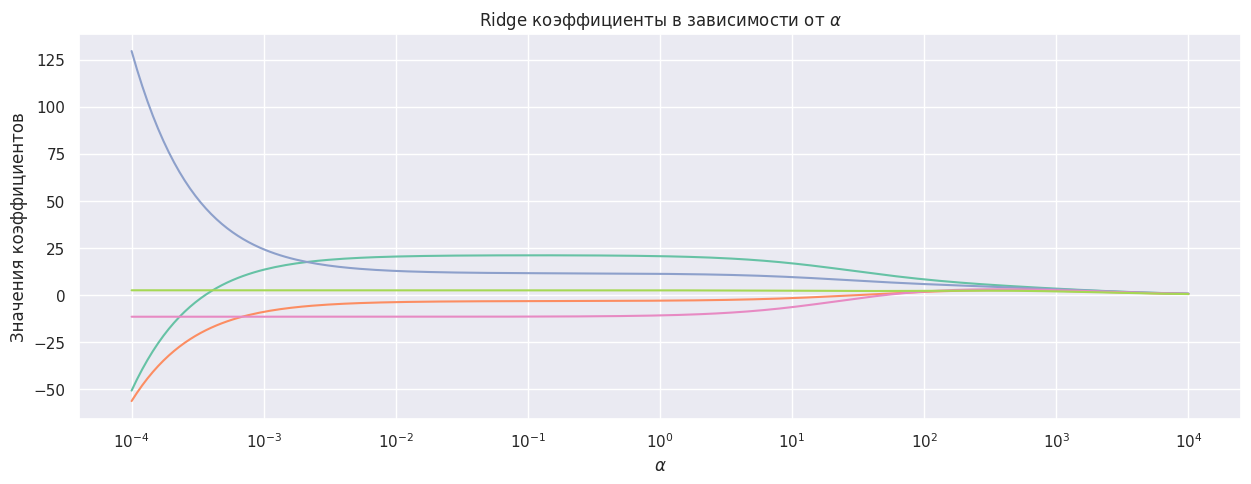

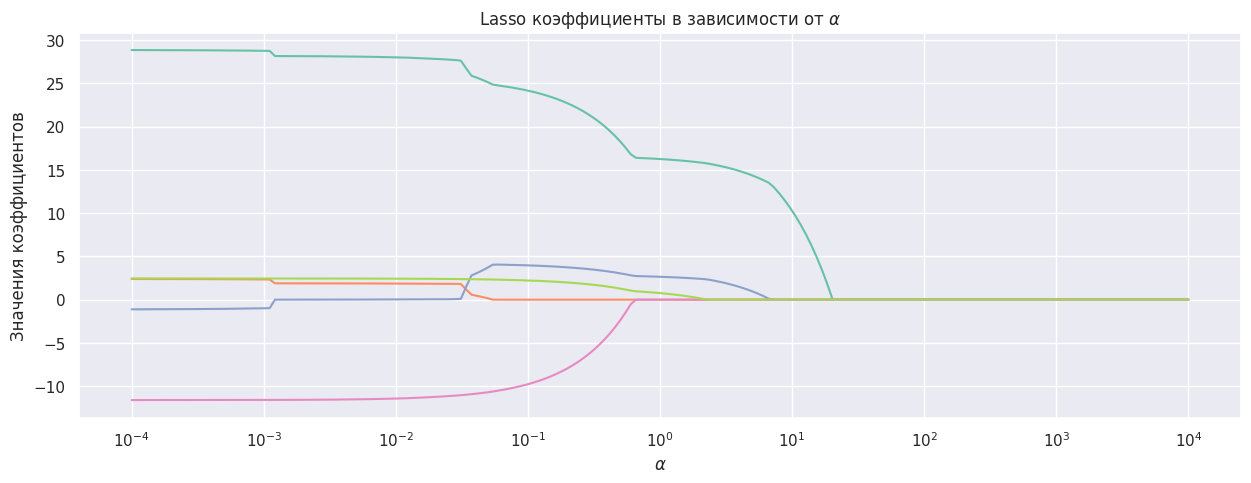

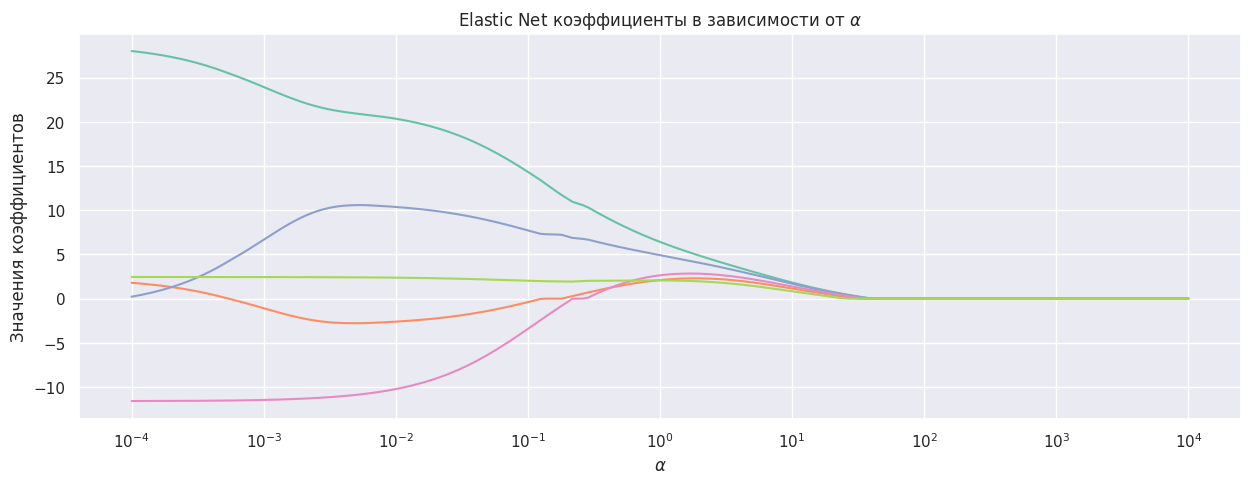

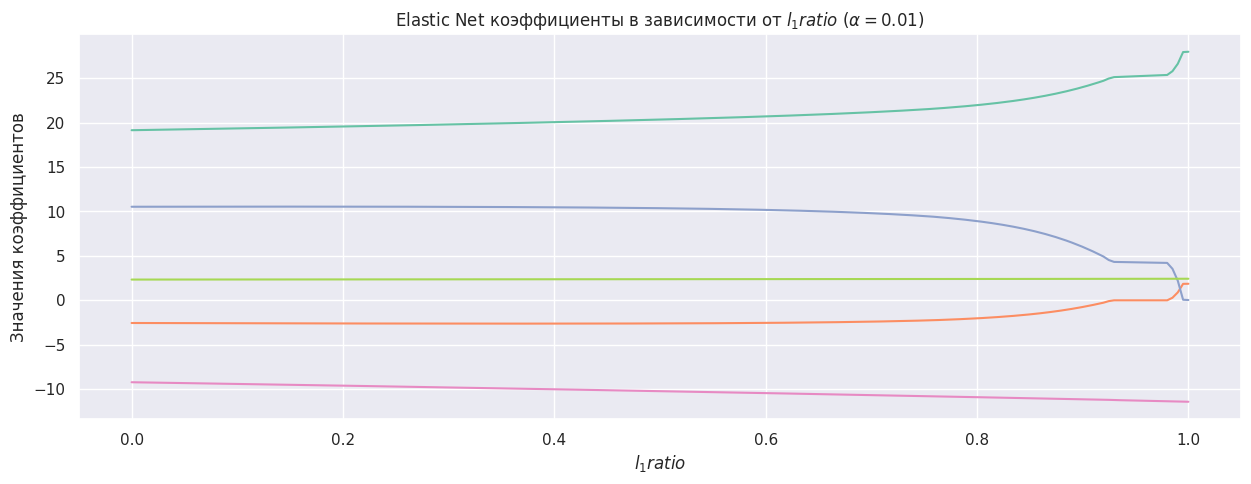

In [9]:
plot_regression_coefficients(X_train_scaled, y_train)

Как и ожидалось, чем больше значения параметра, тем ниже значения коэффициентов из-за регуляризации. При этом при слишком больших значениях параметра модель не обучается. 

При этом если $l_1 ratio$ близко к 1, то у нас зануляется больше коэффициентов, это может быть полезным свойством Lasso в данной задаче

Вывод о возможном значении гиперпараметра сделать сложно, лучше использовать поиск гиперпараметров.

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [10]:
def calculate_condition_number(X):
    """
    Рассчитывает индекс обусловленности
    
    """
    cond = np.linalg.cond(X)
    return cond
    
def plot_condition_number(X_train_scaled, y_train, alphas=np.logspace(-6, 4, 200)):
    """
    Зависимость индекса обусловленности от параметра модели
    
    """
    
    condition_numbers = []
    
    for alpha in alphas:
        X_reg = X_train_scaled.T @ X_train_scaled + alpha * np.eye(X_train_scaled.shape[1])
        condition_numbers.append(calculate_condition_number(X_reg))
    
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, condition_numbers, label='', color='blue')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Индекс')
    plt.title(r'Индекс обусловленности в зависимости от $\alpha$ для Ridge регрессии')
    plt.grid(True)
    plt.show()

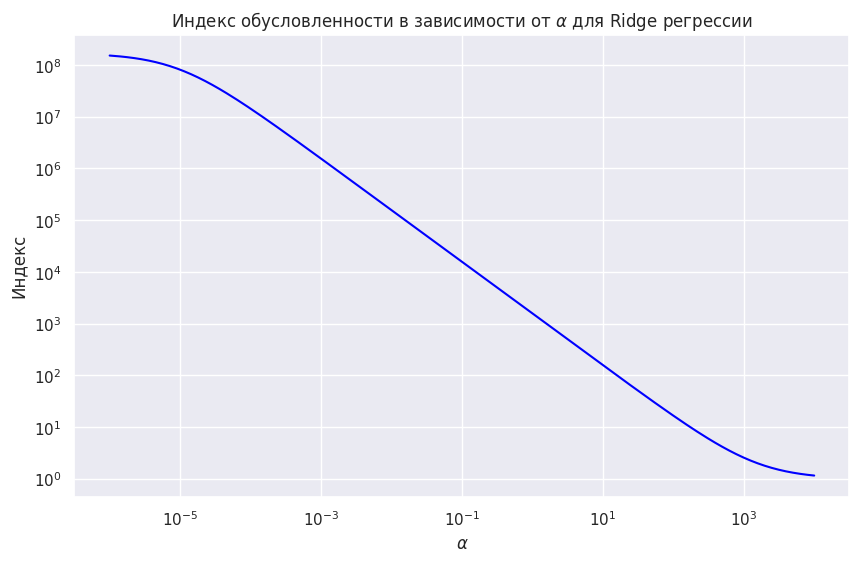

In [11]:
plot_condition_number(X_train_scaled, y_train)

**Вывод:** При маленьких $\alpha$ данные мультиколлинеарны (индекс >=10), но при больших $\alpha$ (порядка $10^2-10^3$) индекс обусловленности уменьшается до значения порядка 10, а значит Ridge компонента регрессии помогает бороться с мультиколлинеарностью

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [12]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline

def grid_search(X_train_scaled, y_train, model,
                parameters_grid, cv_strategy=ShuffleSplit(n_splits=5, test_size=0.25,
                                                          random_state=0)):
    """
    Поиск лучшей модели через перебор по сетке
    """
    pipeline = Pipeline([
        ('model', model)
    ])
    
    rs = GridSearchCV(
        estimator=pipeline,
        param_grid=parameters_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=cv_strategy,
        verbose=5,
        error_score='raise'
    )
    
    rs.fit(X_train_scaled, y_train)
    
    best_params = rs.best_params_
    best_score = -rs.best_score_
    best_model = rs.best_estimator_ 
    
    return best_params, best_score, best_model


<b><font color="#00b565" size="3">Исправил код</font></b>

<b><font color="#00b565" size="3"> Замечание: </font></b> <i> При поиске гиперпараметров оптимальное значение находится на границе сетки. Комм. Если при поиске оптимального гиперпараметра лучшее значение находится на границе сетки, то это повод расширить или сдвинуть сетку.   </i>



In [ ]:
ridge_parameters_grid = {'model__alpha':  np.linspace(0, 1, num=1000)}
best_params_ridge, best_mse_ridge, ridge = grid_search(X_train_scaled,
                                                       y_train,
                                                       Ridge(fit_intercept=True, max_iter=1000),
                                                       ridge_parameters_grid)

lasso_parameters_grid = {'model__alpha':  np.linspace(0, 1e-5, num=1000)}
best_params_lasso, best_mse_lasso, lasso = grid_search(X_train_scaled,
                                                       y_train,
                                                       Lasso(fit_intercept=True, max_iter=1000),
                                                       lasso_parameters_grid)


elastic_net_parameters_grid = {
    'model__alpha':  np.linspace(0, 0.001, num=100),
    'model__l1_ratio':  np.linspace(0, 1, num=50)
}
best_params_elastic, best_mse_elastic, elastic = grid_search(X_train_scaled,
                                                             y_train,
                                                             ElasticNet(fit_intercept=True, max_iter=1000),
                                                             elastic_net_parameters_grid)


<b><font color="#00b565" size="3">Исправил код</font></b>

<b><font color="#00b565" size="3"> Замечание: </font></b> <i> При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}")</i>



In [14]:
def round_params(params, precision):
    return {k: round(v, precision) for k, v in params.items()}

print("Лучшие параметры Ridge:", round_params(best_params_ridge, 5))
print("Лучший MSE Ridge:", round(best_mse_ridge, 2))

print("Лучшие параметры Lasso:", round_params(best_params_lasso, 6))
print("Лучший MSE Lasso:", round(best_mse_lasso, 2))

print("Лучшие параметры Elastic Net:", round_params(best_params_elastic, 6))
print("Лучший MSE Elastic Net:", round(best_mse_elastic, 2))


Лучшие параметры Ridge: {'model__alpha': 0.001}
Лучший MSE Ridge: 35.08
Лучшие параметры Lasso: {'model__alpha': 1e-05}
Лучший MSE Lasso: 35.08
Лучшие параметры Elastic Net: {'model__alpha': 1e-05, 'model__l1_ratio': 1.0}
Лучший MSE Elastic Net: 35.08


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [15]:
from sklearn.metrics import mean_squared_error
for i, model in enumerate([ridge, lasso, elastic]):
    name = [' ridge', ' lasso', ' elastic']
    y_pred = model.predict(X_test_scaled)
    print("MSE ", round(mean_squared_error(y_test, y_pred), 3), name[i])

MSE  33.475  ridge
MSE  33.471  lasso
MSE  33.471  elastic


В целом, elastic-lasso оказались лучше ridge. Elastic в силу $l_1 ratio = 1$ отдает приоритет Lasso компоненте, игнорируя Ridge, за счет этого она будет самой оптимальной в более общей ситуации

<b><font color="#00b565" size="3">===== Конец исправлений в задаче 3 =====</font></b>

**4.** Сделайте общий вывод по задаче.

**Вывод:** метод сетки упрощает подбор гиперпараметров; elastic net совмещает в себе преимущества Lasso и Ridge; можно брать производную модуля

---
## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| > c\}$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

Для начала заметим, что
$$
\frac{\partial R}{\partial x} = x I\{|x| < c\} + c~\text{sign} x I\{|x| > c\}
$$

Откуда для перехода $\theta \rightarrow \theta'$:

$$
\theta' = \theta - \eta \nabla \left( \sum_{i=1}^n R(Y_i - x_i^T\theta) \right)
$$

$$
\theta'_j = \theta_j - \eta \frac{\partial}{\theta_j} \sum_{i=1}^n R(Y_i - x_i^T\theta) = 
\theta_i- \eta \sum_{i=1}^n \left( (Y_i - x_i^T\theta) I\{| (Y_i - x_i^T\theta) | < c\} + c~\text{sign} (Y_i - x_i^T\theta) I\{|(Y_i - x_i^T\theta)| > c\} \right) (- x_{ij})
$$

GD:

$$\theta_{new, j} = \theta_{old, j} - \eta \cdot \frac{1}{n} \sum_{i=1}^n \left( (Y_i - x_i^T\theta) I\{| (Y_i - x_i^T\theta) | < c\} + c~\text{sign} (Y_i - x_i^T\theta) I\{|(Y_i - x_i^T\theta)| > c\} \right) (- x_{ij})  $$

SGD с батчем размера $k$: случайно выбираются индексы $I = (i_1, i_2, \ldots i_k)$, причем $i_j \sim U(1, 2, \ldots n)$ - равномерно распределены:

$$\theta_{new, j} = \theta_{old, j} - \eta \cdot \frac{1}{k} \sum_{i\in I} \left( (Y_i - x_i^T\theta) I\{| (Y_i - x_i^T\theta) | < c\} + c~\text{sign} (Y_i - x_i^T\theta) I\{|(Y_i - x_i^T\theta)| > c\} \right) (- x_{ij})  $$

($I$ на каждой итерации выбирается отдельно)

**Вывод:** польза такой функции - что это сглаженный модуль, теперь эта функция дифференцируема. Причем параметр c позволяет переходить от линейной к квадратичной ошибкам, в зависимости от ее величины

**2.** Реализуем теперь класс

In [16]:
class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100, learning_rate=0.01):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        :param learning_rate: скорость обучения (коэффициент шага градиентного спуска)
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def huber_derivative(self, residuals):
        """
        Вычисляет производную функции потерь Хьюбера для вектора остаточных ошибок.
        
        :param residuals: вектор остаточных ошибок (размерность n_samples)
        :return: вектор производных для каждого остатка
        """
        quadratic_mask = np.abs(residuals) <= self.c
        
        derivatives = residuals * quadratic_mask
        
        derivatives += self.c * np.sign(residuals) * (~quadratic_mask)

        return derivatives
        
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой переменной
        '''
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            
        n_samples, n_features = X.shape
        self.theta = np.random.randn(n_features, 1)
        
        for _ in range(self.max_iter):
            y_pred = np.dot(X, self.theta)
            
            residuals = y - y_pred
            
            huber_grads = self.huber_derivative(residuals)
            
            gradient = -np.dot(X.T, huber_grads) / n_samples
            self.theta -= self.learning_rate * gradient
            
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        pred = np.dot(X, self.theta)
        return pred.flatten()
    

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990
3,-0.291837,-1.616474,-0.761492,-56.474495
4,0.938747,0.087531,0.607112,189.589573


In [18]:
X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1)

y_train = train[['target']]
y_test = test[['target']]

Не забудем отскейлить X

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

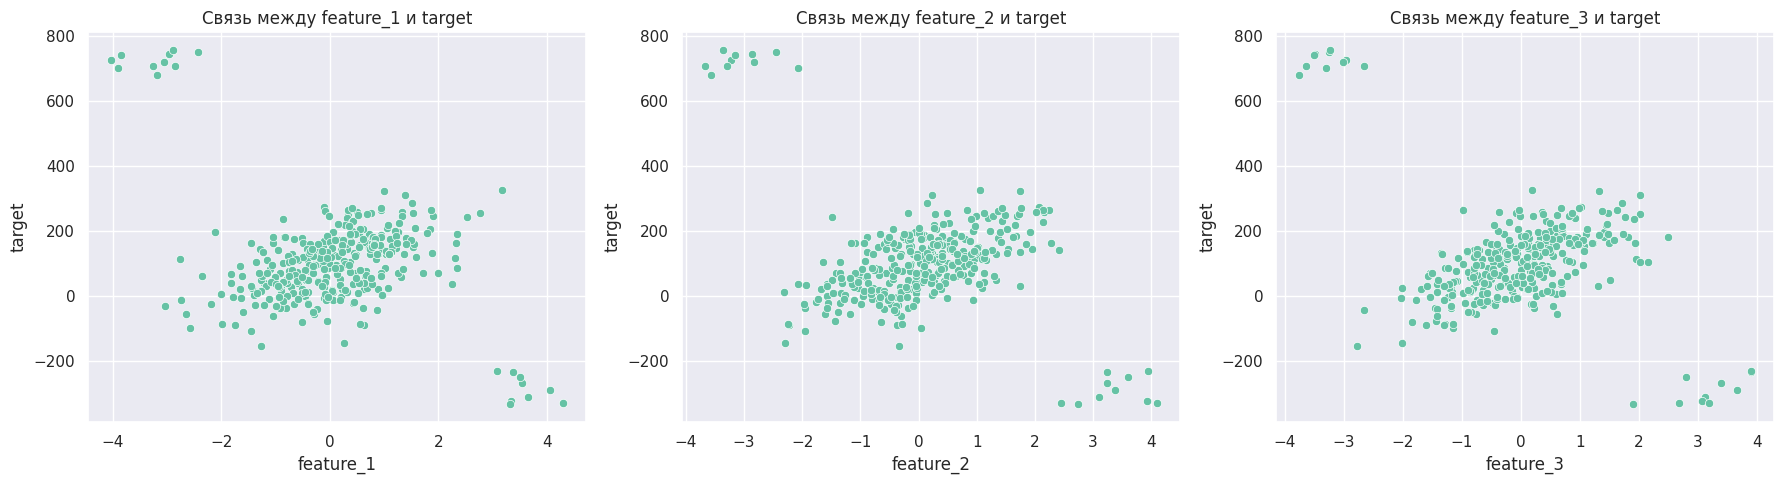

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(['feature_1', 'feature_2', 'feature_3']):
    sns.scatterplot(x=train[feature], y=y_train['target'], ax=axes[i])
    axes[i].set_title(f'Связь между {feature} и target')

plt.tight_layout()
plt.show()

**Вывод:** в данных есть выбросы, они могут сильно влиять на результат, если велика роль квадратичной ошибки, линейная же ошибка будет к ней менее чувствительна. Это дает выигрыш Huber-лоссу по сравнению с Ridge или Elastic Net

**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred_lr_train = model.predict(X_train_scaled)
y_pred_lr = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

print(f"MSE на тестовой выборке: {round(mse, 2)}")
print(f"MAE на тестовой выборке: {round(mae, 2)}")

MSE на тестовой выборке: 17025.81
MAE на тестовой выборке: 105.61


**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [22]:
model = HuberRegression(max_iter=7000, learning_rate=0.1)

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE на тестовой выборке: {round(mse, 2)}")
print(f"MAE на тестовой выборке: {round(mae, 2)}")

MSE на тестовой выборке: 22.79
MAE на тестовой выборке: 3.94


**Вывод:** ошибка MSE сильно уменьшилась. Это работает благодаря линейной компоненте связанной с регуляризацией

**6.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

<b><font color="#00b565" size="3">Исправил ответ на вопрос</font></b>

<b><font color="#00b565" size="3"> Замечание: </font></b> <i>  Нет ответа на вопрос "Какую метрику стоит использовать? Почему?" в пункте 6. (-5.0)  </i>



Стоит использовать MAE, потому что она менее чувствительна к выбросам, в отличие от MSE (линия вместо квадрата для них)

In [27]:
huber_parameters_grid = {
    'c':  np.linspace(0, 5, 10),
    'max_iter': [3000, 8000],
    'learning_rate': [0.1, 1]
}

ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

model = HuberRegression()

gs = GridSearchCV(
    estimator=model,
    param_grid=huber_parameters_grid,
    scoring='neg_mean_absolute_error',
    cv=ss
)

gs.fit(X_train_scaled, y_train)

best_params = gs.best_params_
best_score = -gs.best_score_
best_model = gs.best_estimator_ 

<b><font color="#00b565" size="3">Исправил код</font></b>

<b><font color="#00b565" size="3"> Замечание: </font></b> <i>  При печати оптимальных значений метрики нет округления. Комм. При показе чисел с плавающей точкой нам не нужны все знаки, которые могут быть напечатаны. Используйте форматирование. Например, print(f"{value:.5f}"). (-1.0)  </i>



Посчитаем MSE и MAE на тестовой выборке:

In [28]:
model = HuberRegression(max_iter=best_params['max_iter'],
                        learning_rate=best_params['learning_rate'],
                        c=best_params['c'])

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Лучшие параметры:", round_params(best_params, 5))
print(f"MSE на тестовой выборке: {round(mse, 2)}")
print(f"MAE на тестовой выборке: {round(mae, 2)}")

Лучшие параметры: {'c': 1.66667, 'learning_rate': 1, 'max_iter': 3000}
MSE на тестовой выборке: 22.69
MAE на тестовой выборке: 3.94


Выходит, что MAE-MSE уже примерно оптимальные, что и на изначальной моделе (дефолтной), что и на подобранной - c уже оптимально отбрасывает выбросы

<b><font color="#00b565" size="3">===== Конец исправлений в задаче 4 =====</font></b>

**7.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?.

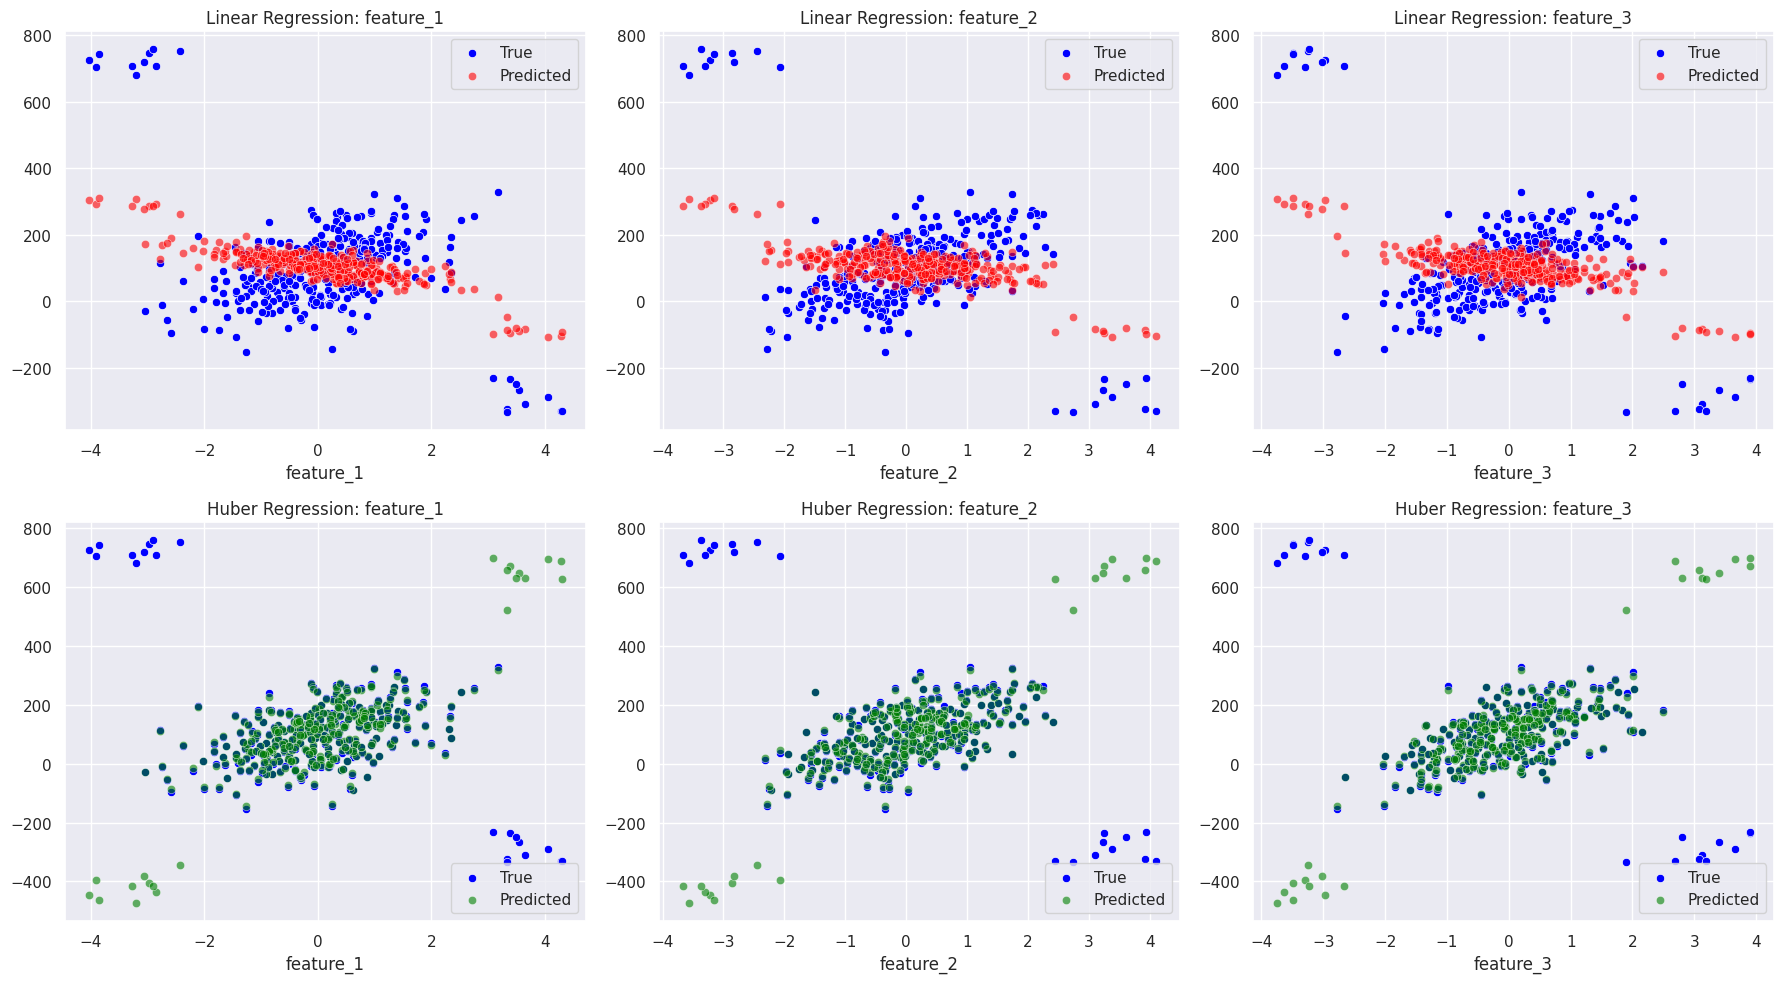

In [29]:
features = ['feature_1', 'feature_2', 'feature_3']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(features):
    # Линейный график для линейной регрессии
    sns.scatterplot(x=X_train[feature], y=y_train.values.ravel(), ax=axes[0, i], color='blue', label='True')
    sns.scatterplot(x=X_train[feature], y=y_pred_lr_train.flatten(), ax=axes[0, i], color='red', label='Predicted', alpha=0.6)
    axes[0, i].set_title(f'Linear Regression: {feature}')
    axes[0, i].legend()

    # Предсказание с Huber
    y_huber_pred = model.predict(X_train_scaled)
    sns.scatterplot(x=X_train[feature], y=y_train.values.ravel(), ax=axes[1, i], color='blue', label='True')
    sns.scatterplot(x=X_train[feature], y=y_pred_train, ax=axes[1, i], color='green', label='Predicted', alpha=0.6)
    axes[1, i].set_title(f'Huber Regression: {feature}')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

**Вывод:** Как видно, на Huber не влияют выбросы, из-за этого он точный. Это и есть плюсы Huber по сравнению с квадратичными моделями